In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [0]:
from google.colab import drive
# drive.mount('/content/drive')

In [3]:

data = pd.read_csv('/content/evaluation.csv')
data

car_price car_maintenance_cost  ... car_safety decision
0        vhigh                vhigh  ...        low    unacc
1        vhigh                vhigh  ...        med    unacc
2        vhigh                vhigh  ...       high    unacc
3        vhigh                vhigh  ...        low    unacc
4        vhigh                vhigh  ...        med    unacc
...        ...                  ...  ...        ...      ...
1723       low                  low  ...        med     good
1724       low                  low  ...       high    vgood
1725       low                  low  ...        low    unacc
1726       low                  low  ...        med     good
1727       low                  low  ...       high    vgood

[1728 rows x 7 columns]

## Provide data insights

In [4]:
data.head(5)

car_price car_maintenance_cost  ... car_safety decision
0     vhigh                vhigh  ...        low    unacc
1     vhigh                vhigh  ...        med    unacc
2     vhigh                vhigh  ...       high    unacc
3     vhigh                vhigh  ...        low    unacc
4     vhigh                vhigh  ...        med    unacc

[5 rows x 7 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   car_price             1728 non-null   object
 1   car_maintenance_cost  1728 non-null   object
 2   car_doors             1728 non-null   object
 3   car_capacity          1728 non-null   object
 4   car_luggage_capacity  1728 non-null   object
 5   car_safety            1728 non-null   object
 6   decision              1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#### Do following

[link text](https://)1. Provide statistical information of all columns (counts, unique, frequency)
2. Check for null
3. plot pairplot of columns <br>
> Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.
4. Provide pie-chart of each column

In [6]:
#1 Evaluating counts, unique and frequency of each column
data.describe()

car_price car_maintenance_cost  ... car_safety decision
count       1728                 1728  ...       1728     1728
unique         4                    4  ...          3        4
top        vhigh                vhigh  ...        med    unacc
freq         432                  432  ...        576     1210

[4 rows x 7 columns]

In [7]:
#2 Checking for Null
data.isnull().sum()

car_price               0
car_maintenance_cost    0
car_doors               0
car_capacity            0
car_luggage_capacity    0
car_safety              0
decision                0
dtype: int64

No null values are present 

In [8]:
# Finding Unique Values for each column
print (" Car Price unique values ",data['car_price'].unique())
print (" Car Maintenance Cost Values ",data['car_maintenance_cost'].unique())
print (" Car Doors Values ",data['car_doors'].unique())
print (" car_capacity Values ",data['car_capacity'].unique())
print (" car_luggage_capacity Values ",data['car_luggage_capacity'].unique())
print (" car_safety Values ",data['car_safety'].unique())
print (" decision Values ",data['decision'].unique())




 Car Price unique values  ['vhigh' 'high' 'med' 'low']
 Car Maintenance Cost Values  ['vhigh' 'high' 'med' 'low']
 Car Doors Values  ['2' '3' '4' '5more']
 car_capacity Values  ['2' '4' 'more']
 car_luggage_capacity Values  ['small' 'med' 'big']
 car_safety Values  ['low' 'med' 'high']
 decision Values  ['unacc' 'acc' 'vgood' 'good']


In [0]:
# Label Encoding each column

data.car_price.replace(("vhigh" ,"high" ,"med", "low"), (3, 2, 1, 0), inplace = True)
data.car_maintenance_cost.replace(('vhigh' ,'high' ,'med', 'low'), (3, 2, 1, 0), inplace = True)
data.car_doors.replace(('5more'), ('5'), inplace = True)
data.car_capacity.replace(('more'), ('5'), inplace = True)
data.car_luggage_capacity.replace(('small','med','big'), ('0','1','2'), inplace = True)
data.car_safety.replace(('low','med','high'), ('0','1','2'), inplace = True)


In [10]:
print (" Car Price unique values ",data['car_price'].unique())
print (" Car Maintenance Cost Values ",data['car_maintenance_cost'].unique())
print (" Car Doors Values ",data['car_doors'].unique())
print (" car_capacity Values ",data['car_capacity'].unique())
print (" car_luggage_capacity Values ",data['car_luggage_capacity'].unique())
print (" car_safety Values ",data['car_safety'].unique())
print (" decision Values ",data['decision'].unique())

 Car Price unique values  [3 2 1 0]
 Car Maintenance Cost Values  [3 2 1 0]
 Car Doors Values  ['2' '3' '4' '5']
 car_capacity Values  ['2' '4' '5']
 car_luggage_capacity Values  ['0' '1' '2']
 car_safety Values  ['0' '1' '2']
 decision Values  ['unacc' 'acc' 'vgood' 'good']


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


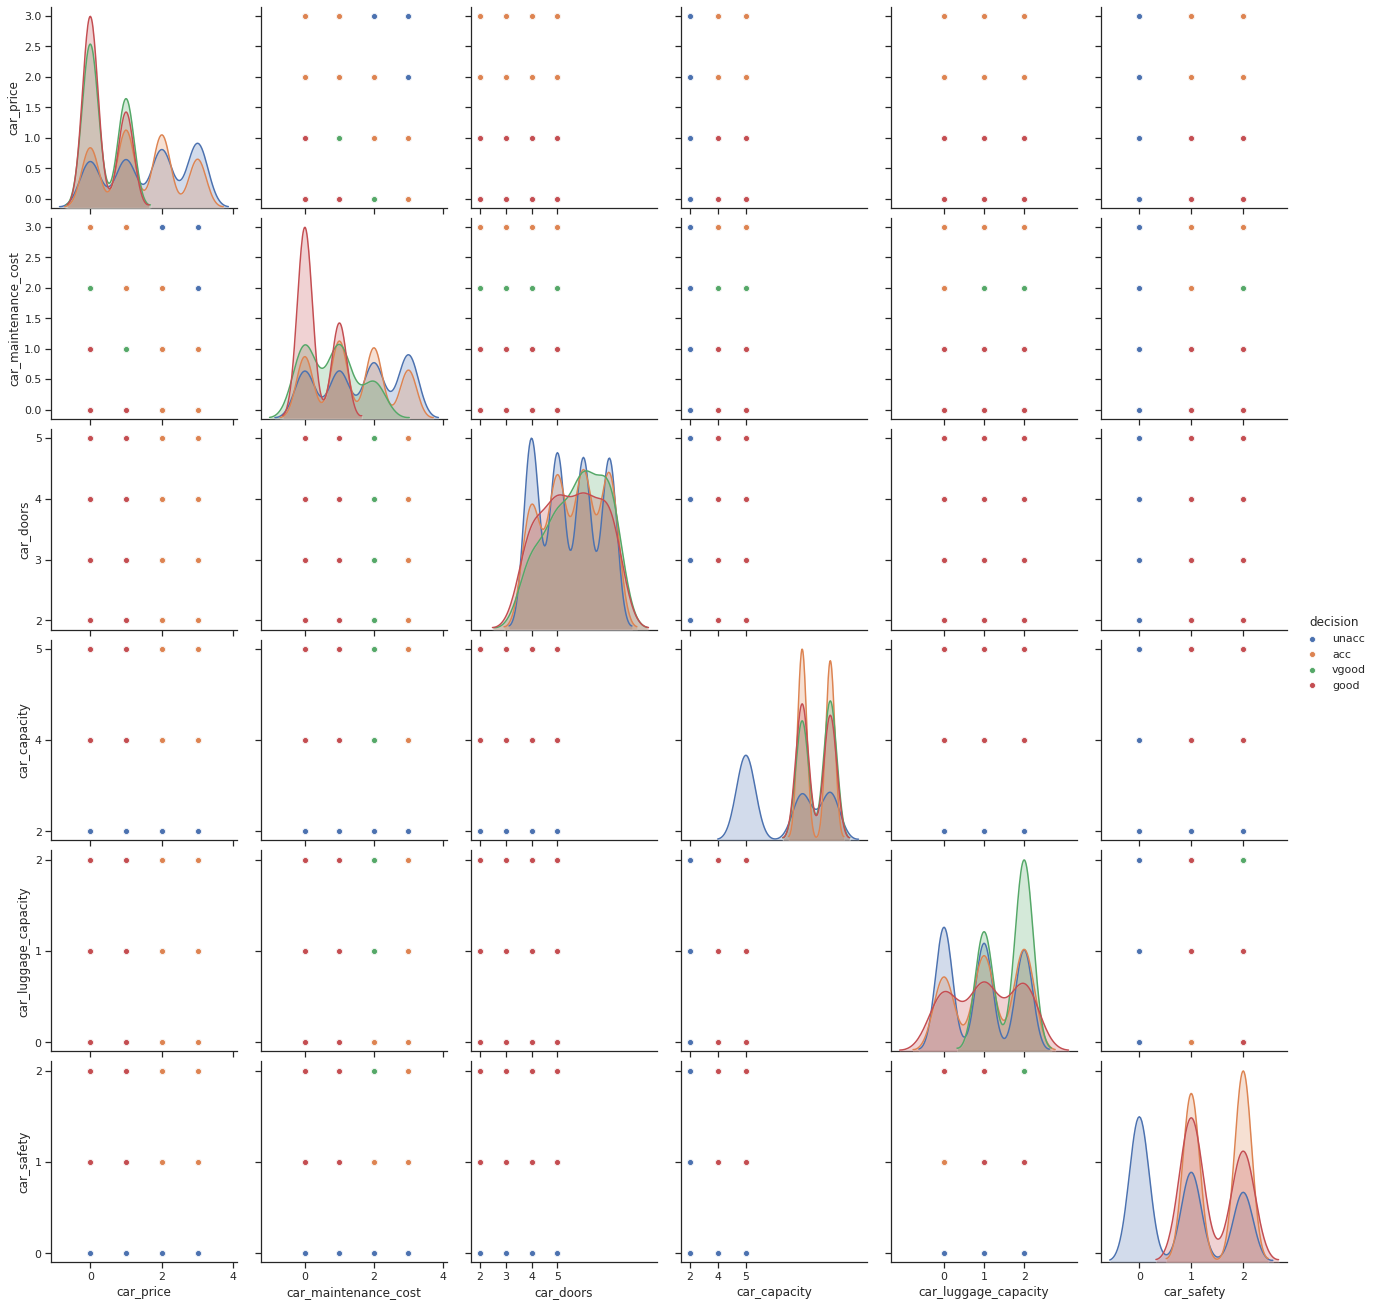

In [11]:
#3 Plotting Pair Plot
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
g=sns.pairplot(data,hue ='decision', height=3 )




In [0]:
data.decision.replace(('unacc', 'acc', 'good', 'vgood'), ('0', '1', '2', '3'), inplace = True)

In [13]:
#4 Plotting Pie Charts for each Column
import matplotlib.pyplot as plt
#4.1 #Finding count of unique values
data['car_price'].value_counts()

3    432
2    432
1    432
0    432
Name: car_price, dtype: int64

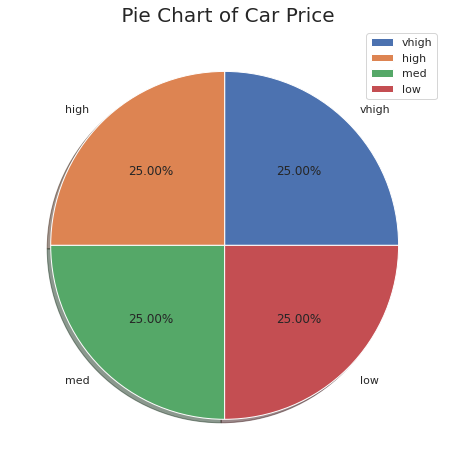

In [14]:

labels = ["vhigh" ,"high" ,"med", "low"]
size = [432, 432, 432, 432]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, shadow = True, autopct = "%.2f%%")
plt.title(' Pie Chart of Car Price', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [15]:
data.car_maintenance_cost.value_counts()

3    432
2    432
1    432
0    432
Name: car_maintenance_cost, dtype: int64

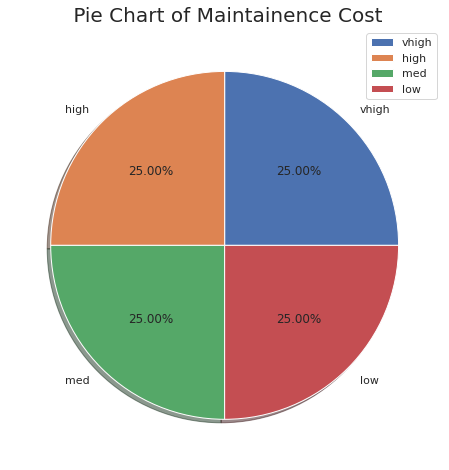

In [16]:

labels = ["vhigh" ,"high" ,"med", "low"]
size = [432, 432, 432, 432]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, shadow = True, autopct = "%.2f%%")
plt.title(' Pie Chart of Maintainence Cost', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [17]:
data.car_doors.value_counts()

5    432
2    432
4    432
3    432
Name: car_doors, dtype: int64

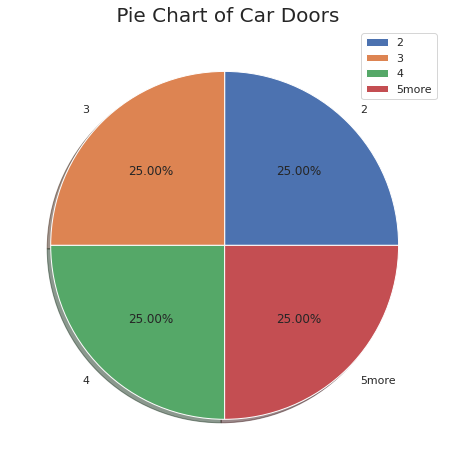

In [18]:

labels = ["2" ,"3" ,"4", "5more"]
size = [432, 432, 432, 432]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels,  shadow = True, autopct = "%.2f%%")
plt.title(' Pie Chart of Car Doors', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [19]:
data.car_capacity.value_counts()

5    576
2    576
4    576
Name: car_capacity, dtype: int64

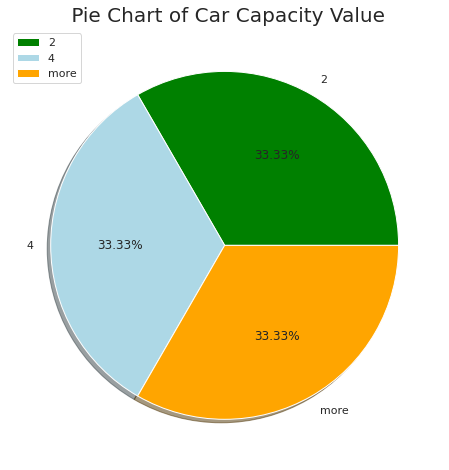

In [20]:

labels = ["2" ,"4" , "more"]
colors = ['green', 'lightblue', 'orange']
size = [576, 576, 576]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, shadow = True, autopct = "%.2f%%")
plt.title(' Pie Chart of Car Capacity Value', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [21]:
data.car_luggage_capacity.value_counts()

1    576
0    576
2    576
Name: car_luggage_capacity, dtype: int64

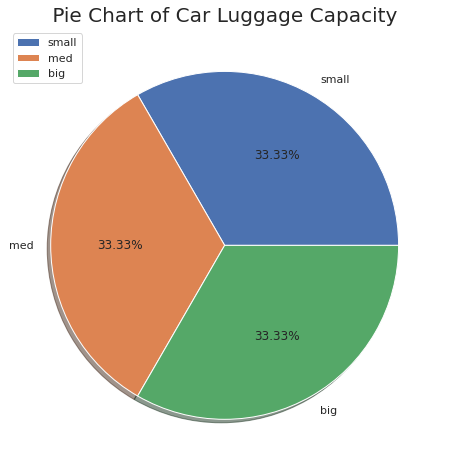

In [22]:
labels = ["small" ,"med" , "big"]
size = [576, 576, 576]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, shadow = True, autopct = "%.2f%%")
plt.title(' Pie Chart of Car Luggage Capacity ', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [23]:
data.car_safety.value_counts()

1    576
0    576
2    576
Name: car_safety, dtype: int64

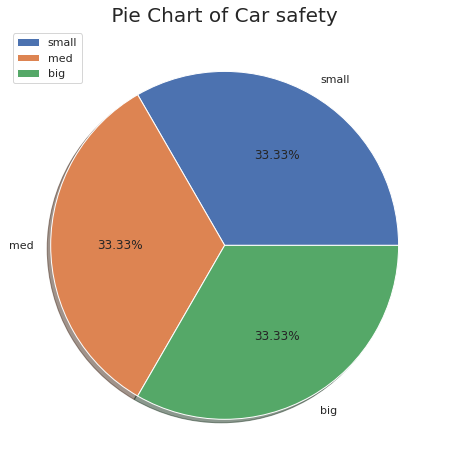

In [24]:
labels = ["small" ,"med" , "big"]
size = [576, 576, 576]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, shadow = True, autopct = "%.2f%%")
plt.title(' Pie Chart of Car safety ', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [25]:

data['decision'].value_counts()

0    1210
1     384
2      69
3      65
Name: decision, dtype: int64

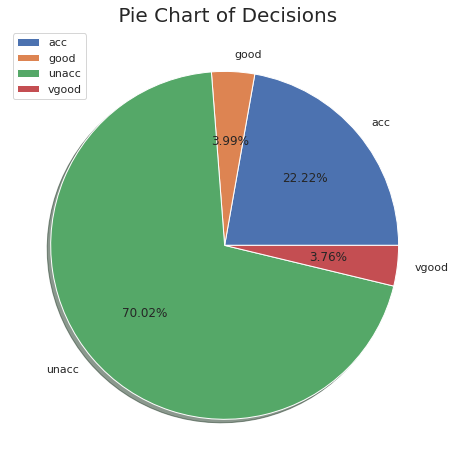

In [26]:
labels = ['acc', 'good', 'unacc', 'vgood']
size = [384, 69, 1210, 65]
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, shadow = True, autopct = "%.2f%%")
plt.title(' Pie Chart of Decisions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

## Data Preprocessing

In [0]:
x = data.iloc[:,:6]
y = data.iloc[:, 6]

In [28]:
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (1728, 6)
Shape of y:  (1728,)


In [0]:
# Splitting the dataset into train and test sets (test_size = 0.2)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)



In [0]:
# Standardization
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()

x_train = stdscaler.fit_transform(x_train)
x_test = stdscaler.transform(x_test)

## Modeling

Perform following task for both `Decision tree` and `KNN`
1. create a model
2. feed training data into the model
3. predict values for your test data
4. visualize classifier
4. find the training and testing accuracy
5. print confusion matrix

NOTE: 
> 1. Use sklearn's DecisionTreeClassifier <br>
> 2. Visualize your decision trees using any (Scikit-learn, Graphviz, Matplotlib) library

### `Decision Tree Classifier`

#### 1. Decision Trees with max_depth = 2

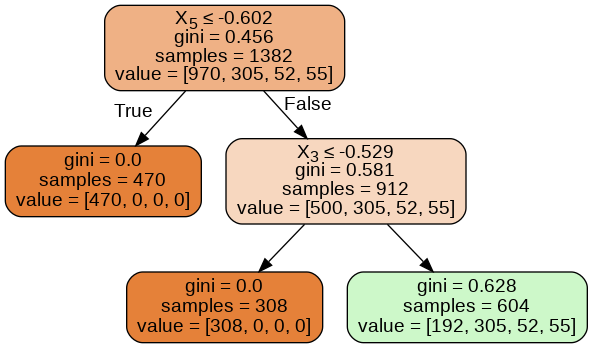

In [31]:
# Model Creation
model = DecisionTreeClassifier(max_depth = 2)

# Fitting the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# Visualizing the Decision Tree
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())




In [32]:
#  Training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

#  Confusion Matrix
print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
print(cm)


Training Accuracy:  0.7836468885672938
Testing Accuracy:  0.7543352601156069
Confusion Matrix
[[182  58   0   0]
 [  0  79   0   0]
 [  0  17   0   0]
 [  0  10   0   0]]


#### 2. Decision Trees with max_depth = 4

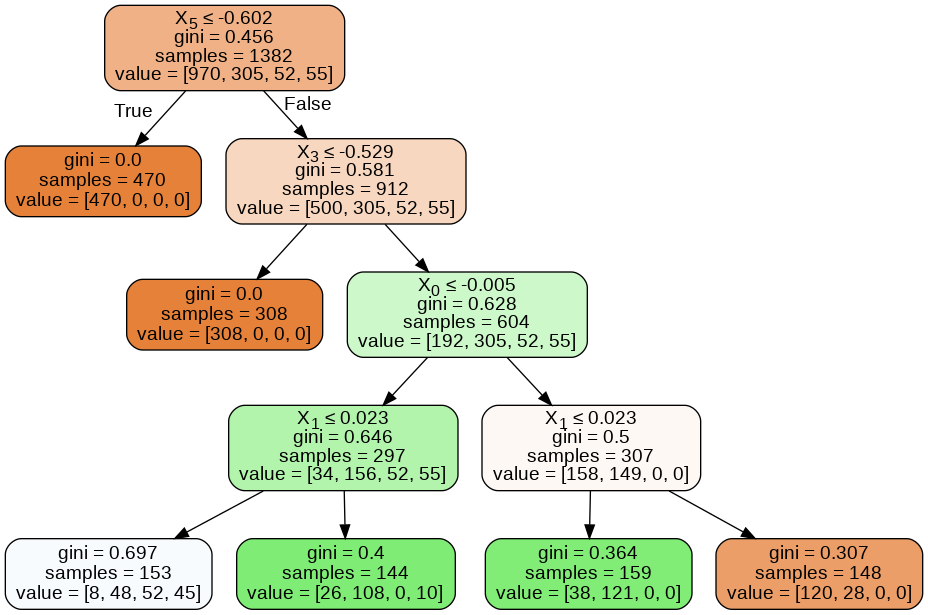

In [33]:
# Model Creation
model = DecisionTreeClassifier(max_depth = 4)

# Fitting the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# Visualizing the Decision Tree
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



In [34]:
#  Training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

#  Confusion Matrix
print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
print(cm)



Training Accuracy:  0.8531114327062229
Testing Accuracy:  0.8410404624277457
Confusion Matrix
[[218  22   0   0]
 [  8  56  15   0]
 [  0   0  17   0]
 [  0   3   7   0]]


#### 3. Decision Trees with max_depth = 6

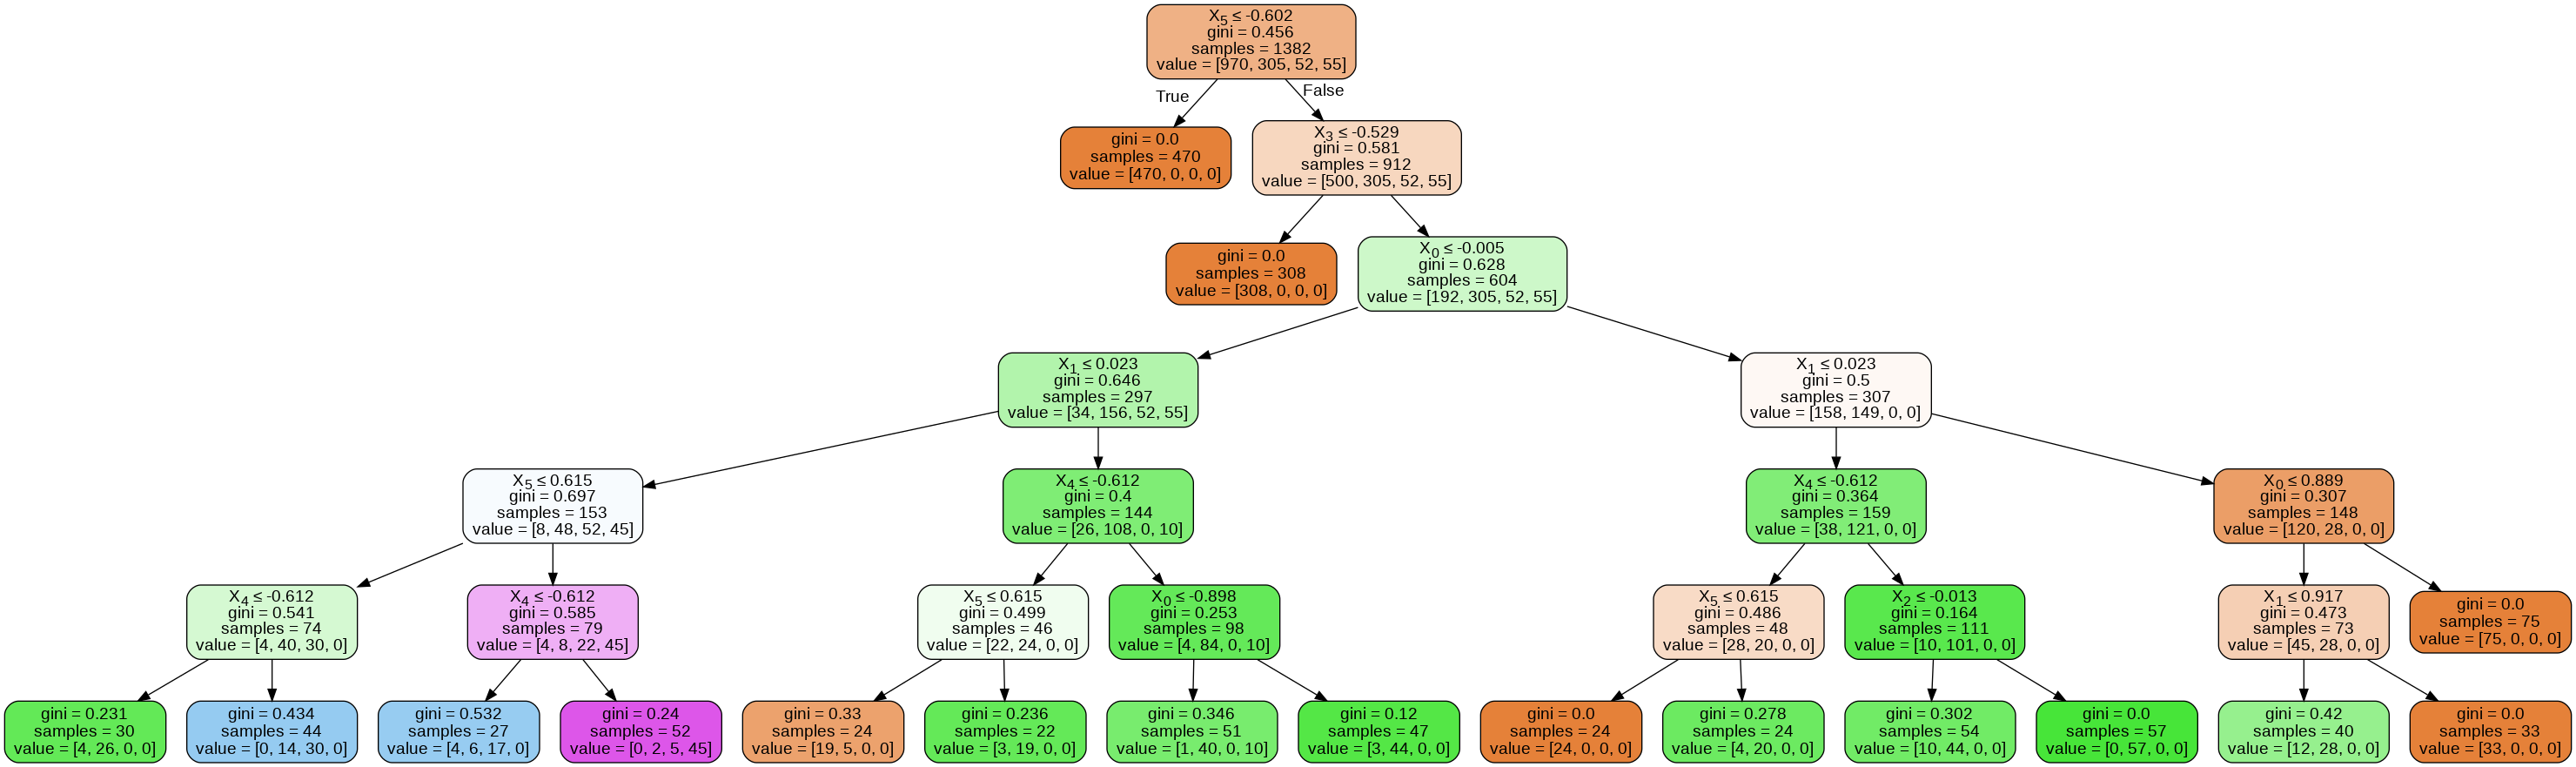

In [35]:
# Model Creation
model = DecisionTreeClassifier(max_depth = 6)

# Fitting the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# Visualizing the Decision Tree
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [36]:

#  Training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

#  Confusion Matrix
print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
print(cm)


Training Accuracy:  0.9399421128798843
Testing Accuracy:  0.9132947976878613
Confusion Matrix
[[232   8   0   0]
 [  2  64  12   1]
 [  0   0  13   4]
 [  0   3   0   7]]


#### 4. Decision Trees with max_depth = 8

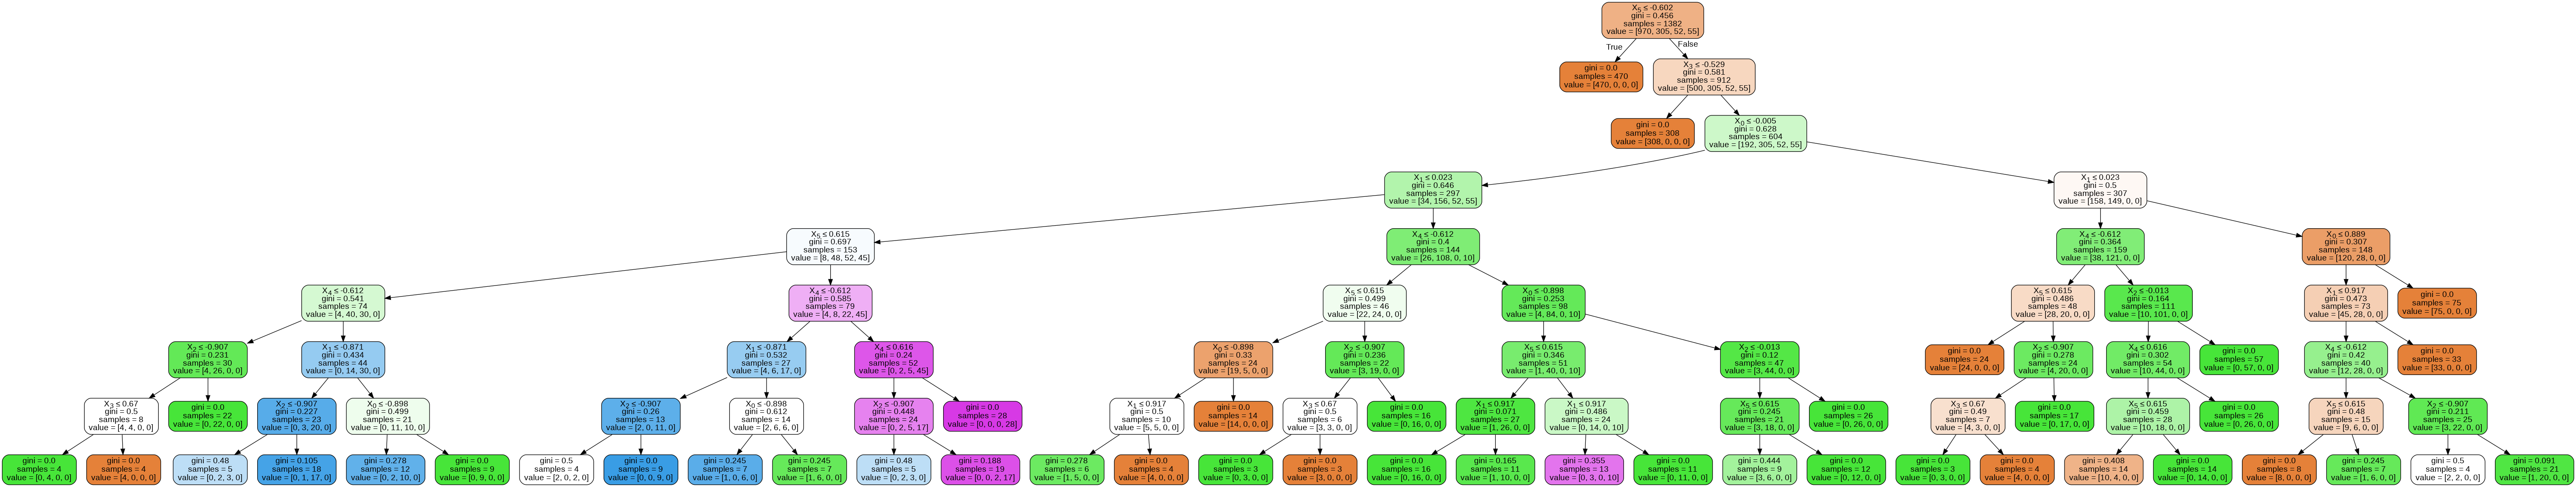

In [37]:
# Model Creation
model = DecisionTreeClassifier(max_depth = 8)

# Fitting the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# Visualizing the Decision Tree
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



In [38]:
#  Training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

#  Confusion Matrix
print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
print(cm)


Training Accuracy:  0.9790159189580319
Testing Accuracy:  0.9566473988439307
Confusion Matrix
[[235   5   0   0]
 [  4  70   4   1]
 [  0   0  16   1]
 [  0   0   0  10]]


#### 5. Decision Trees with max_depth = 10

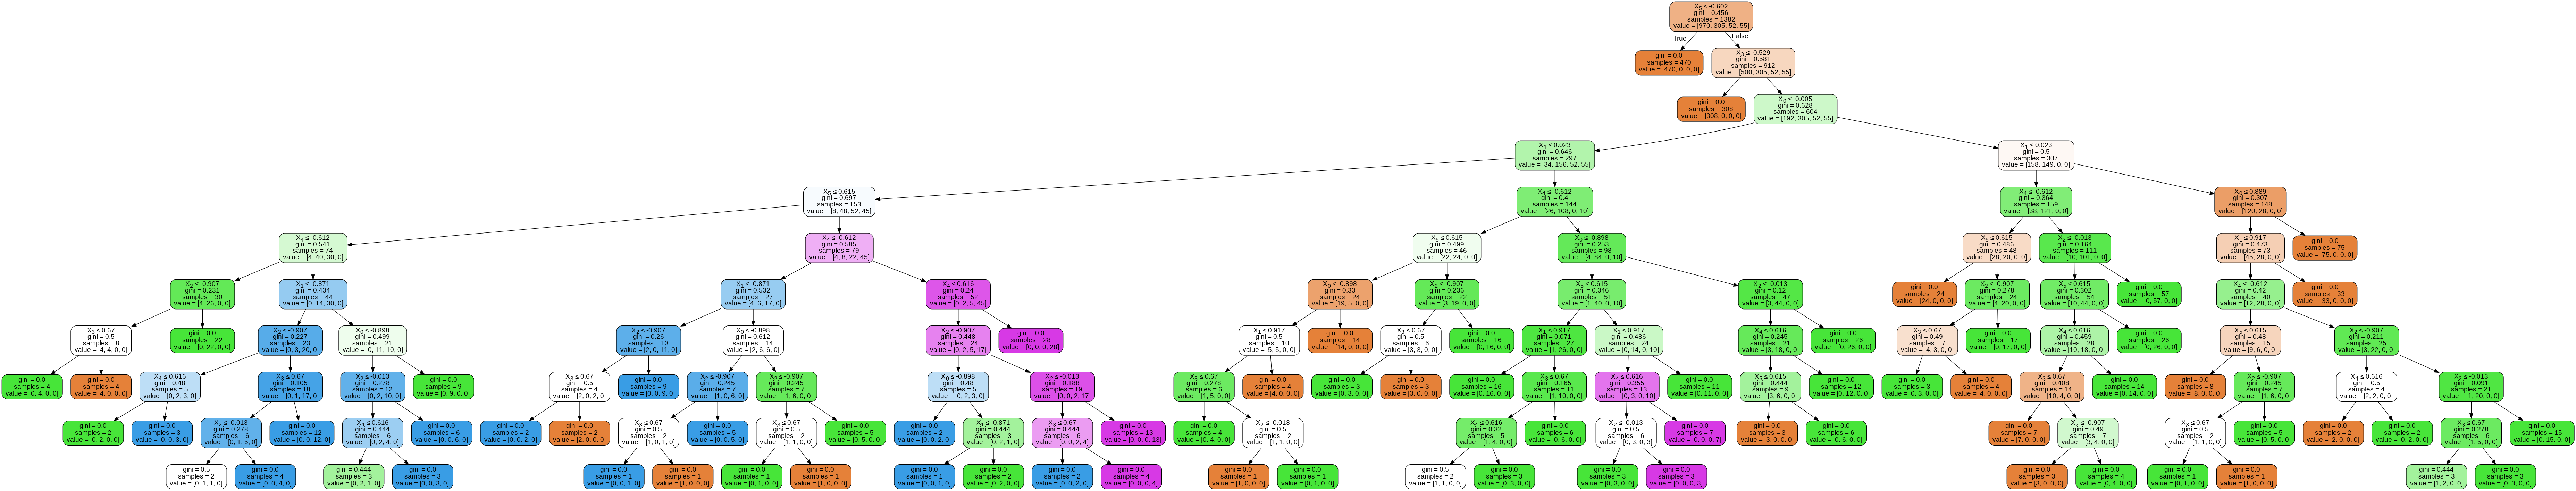

In [39]:
# Model Creation
model = DecisionTreeClassifier(max_depth = 10)

# Fitting the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# Visualizing the Decision Tree
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [40]:
#  Training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

#  Confusion Matrix
print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
print(cm)


Training Accuracy:  0.9971056439942113
Testing Accuracy:  0.9710982658959537
Confusion Matrix
[[239   1   0   0]
 [  6  72   1   0]
 [  0   1  16   0]
 [  0   1   0   9]]


#### 6. Decision Trees with max_depth = 12

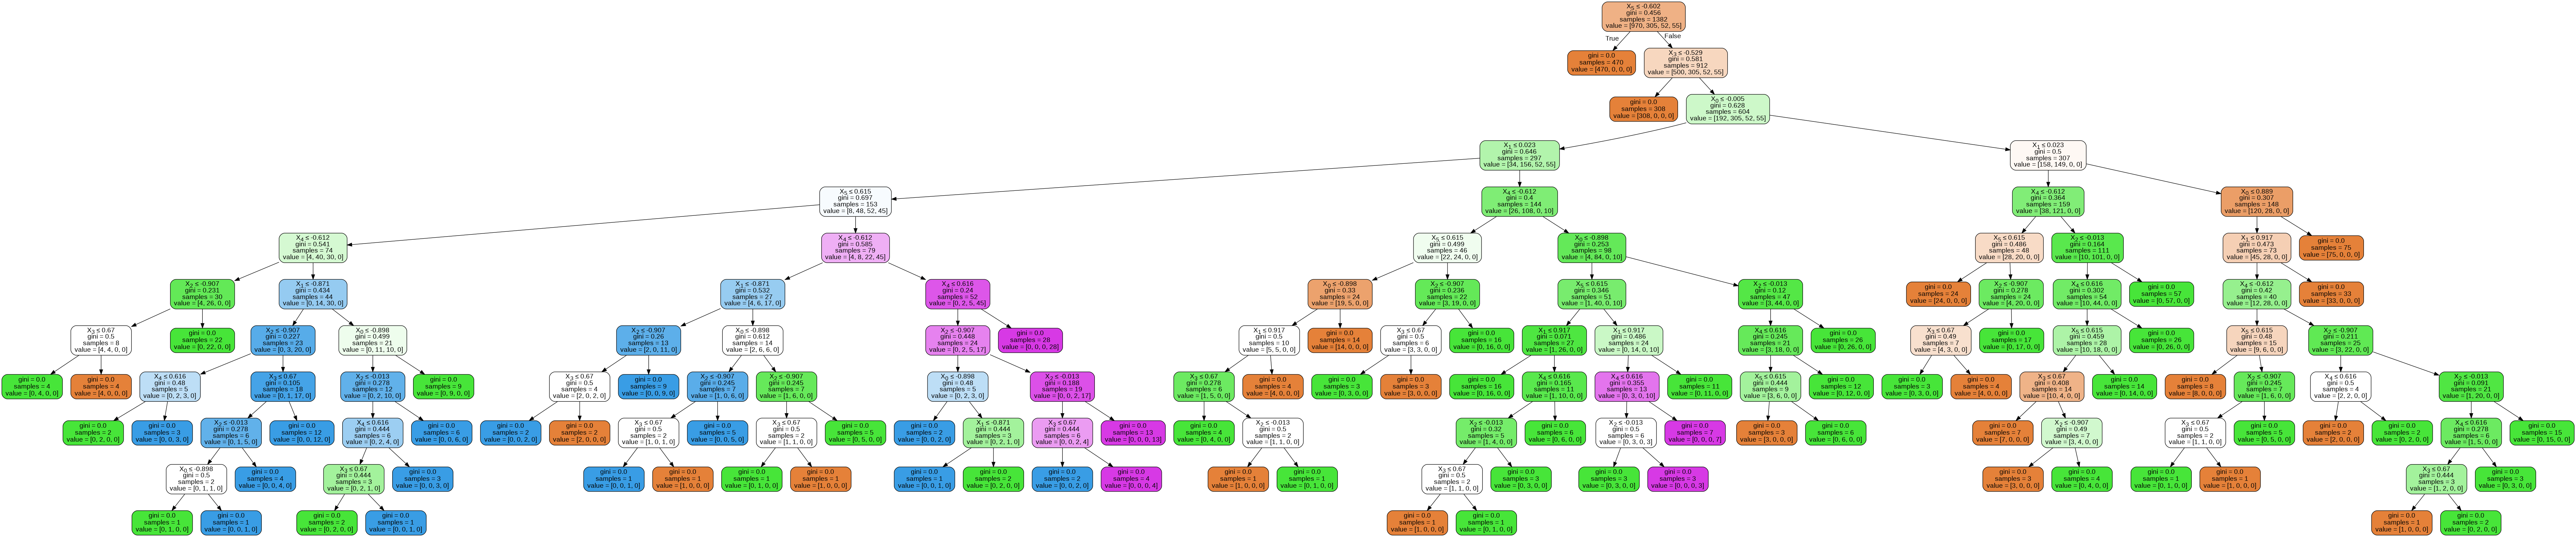

In [41]:
# Model Creation
model = DecisionTreeClassifier(max_depth = 12)

# Fitting the training data into the model
model.fit(x_train, y_train)

# predicting the values for x-test
y_pred = model.predict(x_test)

# Visualizing the Decision Tree
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



In [42]:
#  Training and testing accuracy
print("Training Accuracy: ",model.score(x_train, y_train))
print("Testing Accuracy: ", model.score(x_test, y_test))

#  Confusion Matrix
print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
print(cm)


Training Accuracy:  1.0
Testing Accuracy:  0.9653179190751445
Confusion Matrix
[[239   1   0   0]
 [  6  70   3   0]
 [  0   1  16   0]
 [  0   1   0   9]]


#### plot the graph for performance (accuracy) of decision trees with different max_depth values
max_depth = [2, 4, 6, 8, 10, 12]

No handles with labels found to put in legend.


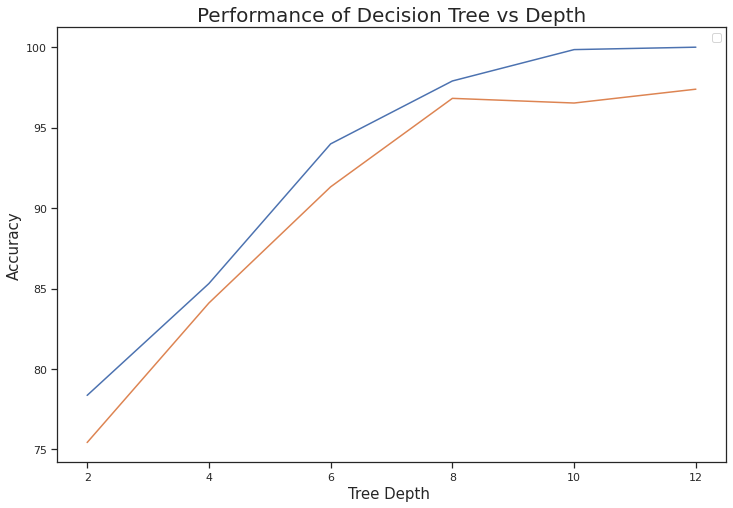

In [43]:
# Plotting the graph for performance with different depth values
depth_array = np.array([2,4,6,8,10,12])
training_acc_array = np.array([78.36, 85.31, 93.99, 97.90, 99.85, 100.0])
testing_acc_array = np.array([75.43, 84.10, 91.32, 96.82, 96.53, 97.39])
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(depth_array, training_acc_array)
plt.plot(depth_array, testing_acc_array)
plt.title('Performance of Decision Tree vs Depth', fontsize = 20)
plt.xlabel('Tree Depth ', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()
plt.show()

### `KNN Classifiers`

NOTE: 
> 1. Use sklearn's KNeighborsClassifier
> 2. Visualize your KNN using any(Scikit-learn, Matplotlib) library

#### 1. n_neighbors = 1

Training Accuracy:  1.0
Testing Accuracy:  0.5549132947976878


Text(0.5, 0, 'Second Component')

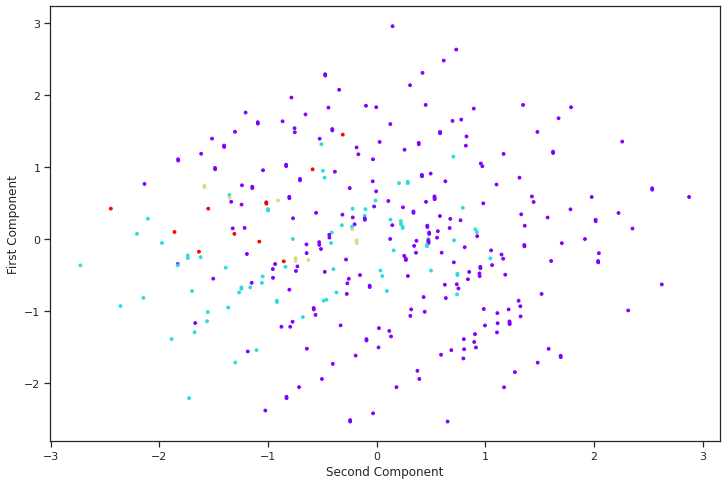

<Figure size 720x720 with 0 Axes>

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Implementing KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 1)

from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

# Performing PCA to trannform into 2 dimension for visualization
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train)
x_test2= pca.fit_transform(x_test)
knn_model.fit(X_train2, y_train)

# Prediction  for x-test
y_pred = knn_model.predict(x_test2)

# Training and Testing accuracy
print("Training Accuracy: ",knn_model.score(X_train2, y_train))
print("Testing Accuracy: ", knn_model.score(x_test2, y_test))

fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(x_test2[:,0], x_test2[:,1], s=8,c=(y_pred.astype(np.integer)), cmap='rainbow')    
ax.set_ylabel('First Component')
ax.set_xlabel('Second Component')


#### 2. n_neighbors = 2

Training Accuracy:  0.8133140376266281
Testing Accuracy:  0.6242774566473989


Text(0.5, 0, 'Second Component')

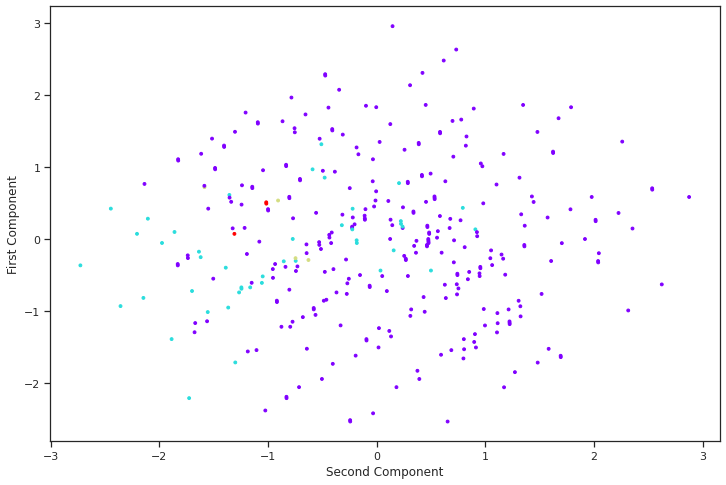

<Figure size 720x720 with 0 Axes>

In [45]:
# Implementing KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 2)

# Performing PCA to trannform into 2 dimension for visualization
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train)
x_test2= pca.fit_transform(x_test)
knn_model.fit(X_train2, y_train)

# Prediction  for x-test
y_pred = knn_model.predict(x_test2)

# Training and Testing accuracy
print("Training Accuracy: ",knn_model.score(X_train2, y_train))
print("Testing Accuracy: ", knn_model.score(x_test2, y_test))

fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(x_test2[:,0], x_test2[:,1], s=8,c=(y_pred.astype(np.integer)), cmap='rainbow')    
ax.set_ylabel('First Component')
ax.set_xlabel('Second Component')


#### 3. n_neighbors = 3

Training Accuracy:  0.7981186685962374
Testing Accuracy:  0.5751445086705202


Text(0.5, 0, 'Second Component')

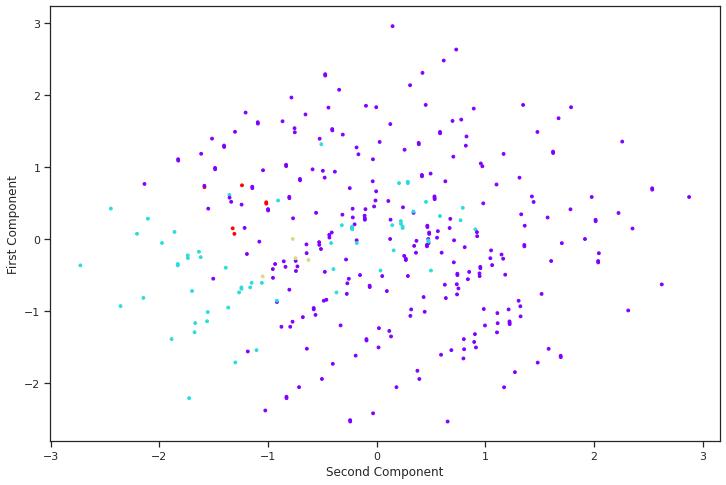

<Figure size 720x720 with 0 Axes>

In [46]:
# Implementing KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)

from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

# Performing PCA to trannform into 2 dimension for visualization
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train)
x_test2= pca.fit_transform(x_test)
knn_model.fit(X_train2, y_train)

# Prediction  for x-test
y_pred = knn_model.predict(x_test2)

# Training and Testing accuracy
print("Training Accuracy: ",knn_model.score(X_train2, y_train))
print("Testing Accuracy: ", knn_model.score(x_test2, y_test))

fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(x_test2[:,0], x_test2[:,1], s=8,c=(y_pred.astype(np.integer)), cmap='rainbow')    
ax.set_ylabel('First Component')
ax.set_xlabel('Second Component')

#### 4. n_neighbors = 4

Training Accuracy:  0.7908827785817656
Testing Accuracy:  0.6040462427745664


Text(0.5, 0, 'Second Component')

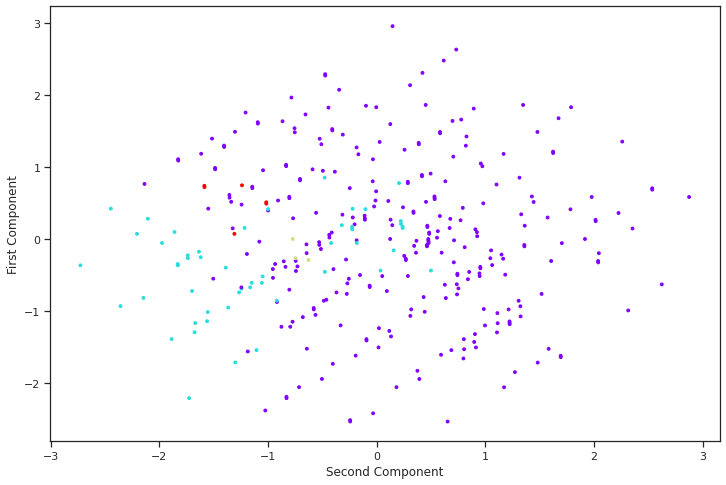

<Figure size 720x720 with 0 Axes>

In [47]:
# Implementing KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 4)

# Performing PCA to trannform into 2 dimension for visualization
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train)
x_test2= pca.fit_transform(x_test)
knn_model.fit(X_train2, y_train)

# Prediction  for x-test
y_pred = knn_model.predict(x_test2)

# Training and Testing accuracy
print("Training Accuracy: ",knn_model.score(X_train2, y_train))
print("Testing Accuracy: ", knn_model.score(x_test2, y_test))

fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.scatter(x_test2[:,0], x_test2[:,1], s=8,c=(y_pred.astype(np.integer)), cmap='rainbow')    
ax.set_ylabel('First Component')
ax.set_xlabel('Second Component')

#### plot the graph for performance (accuracy) of KNN with different neighbours values
n_neighbours = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [48]:
# Calculating the KNN accuracy for neighbours 1  to 10 without performing PCA
training_accuracy=[]
testing_accuracy=[]
for i in range(1,11):
  knn_model = KNeighborsClassifier(n_neighbors = i)
  knn_model.fit(x_train, y_train)
  y_pred = knn_model.predict(x_test)

  print("Neighbour ",i)
  print("Training Accuracy : ",knn_model.score(x_train, y_train))
  print("Testing Accuracy: ", knn_model.score(x_test, y_test))
  print("Confusion Matrix")
  
  training_accuracy.append(knn_model.score(x_train, y_train))
  testing_accuracy.append(knn_model.score(x_test, y_test))
  confusion_mat=confusion_matrix(y_test, y_pred)
  print(confusion_mat)



Neighbour  1
Training Accuracy :  1.0
Testing Accuracy:  0.9421965317919075
Confusion Matrix
[[230  10   0   0]
 [  4  72   2   1]
 [  0   0  15   2]
 [  0   1   0   9]]
Neighbour  2
Training Accuracy :  0.9732272069464544
Testing Accuracy:  0.9450867052023122
Confusion Matrix
[[240   0   0   0]
 [ 10  68   1   0]
 [  0   3  14   0]
 [  0   4   1   5]]
Neighbour  3
Training Accuracy :  0.9913169319826338
Testing Accuracy:  0.9682080924855492
Confusion Matrix
[[236   4   0   0]
 [  2  75   1   1]
 [  0   2  15   0]
 [  0   1   0   9]]
Neighbour  4
Training Accuracy :  0.9869753979739508
Testing Accuracy:  0.9710982658959537
Confusion Matrix
[[239   1   0   0]
 [  6  72   0   1]
 [  0   1  16   0]
 [  0   1   0   9]]
Neighbour  5
Training Accuracy :  0.9905933429811867
Testing Accuracy:  0.9739884393063584
Confusion Matrix
[[238   2   0   0]
 [  4  74   1   0]
 [  0   1  16   0]
 [  0   1   0   9]]
Neighbour  6
Training Accuracy :  0.9876989869753979
Testing Accuracy:  0.9653179190751445

No handles with labels found to put in legend.


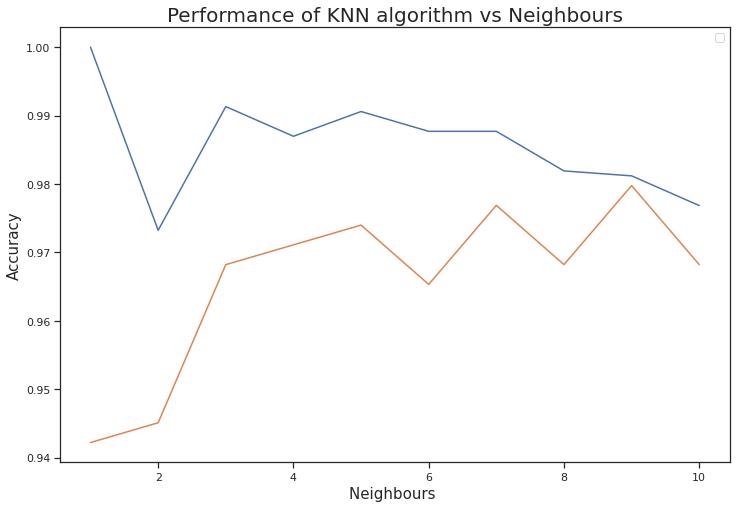

In [49]:
# Plotting the graph for performance with different depth values
depth_array = np.array([1,2,3,4,5,6,7,8,9,10])
plt.rcParams['figure.figsize'] = (12, 8)
plt.plot(depth_array, training_accuracy)
plt.plot(depth_array, testing_accuracy)
plt.title('Performance of KNN algorithm vs Neighbours', fontsize = 20)
plt.xlabel('Neighbours ', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()
plt.show()